In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [2]:
wine=load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
#sklearn建模流程
#实例化
#训练集带入实例化后的模型去进行训练，使用的接口是fit
#使用其他接口将测试集导入我们训练好的模型，去获取我们希望获取的结果

In [5]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [6]:
clf=DecisionTreeClassifier(random_state=0)
rfc=RandomForestClassifier(random_state=0)
clf=clf.fit(Xtrain,Ytrain)
rfc=rfc.fit(Xtrain,Ytrain)
score_c=clf.score(Xtest,Ytest)
score_r=rfc.score(Xtest,Ytest)
#对比决策树和随机森林的score
print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
     )

Single Tree:0.9629629629629629 Random Forest:1.0


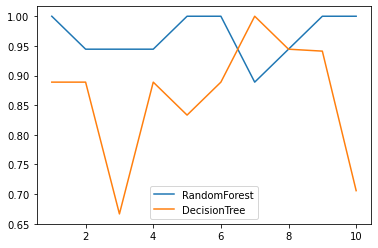

In [7]:
#交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc=RandomForestClassifier(n_estimators=10)
rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10)
#第一个参数：实例化好的模型；第二个参数：完整的没有分裂之前的特征矩阵
#第三参数：完整的标签；第四个参数：cv（把完整的特征矩阵分成几份）
clf=DecisionTreeClassifier()
clf_s=cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()#显示图例即显示标签label等
plt.show()

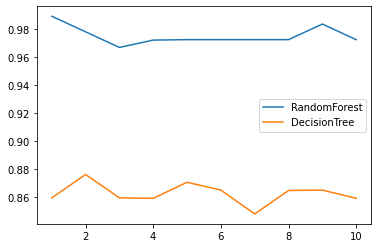

In [8]:
rfc_l=[]
clf_l=[]
#循环10次，看交叉验证的对比(即10*10=100次交叉验证)
for i in range(10):
    rfc=RandomForestClassifier(n_estimators=25)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf=DecisionTreeClassifier()
    clf_s=cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)  
plt.plot(range(1,11),rfc_l,label="RandomForest")
plt.plot(range(1,11),clf_l,label="DecisionTree")
plt.legend()
plt.show()
#通过100次的交叉验证，然后每10次取一个平均值，发现随机森林比决策树好太多

0.9888888888888889 63


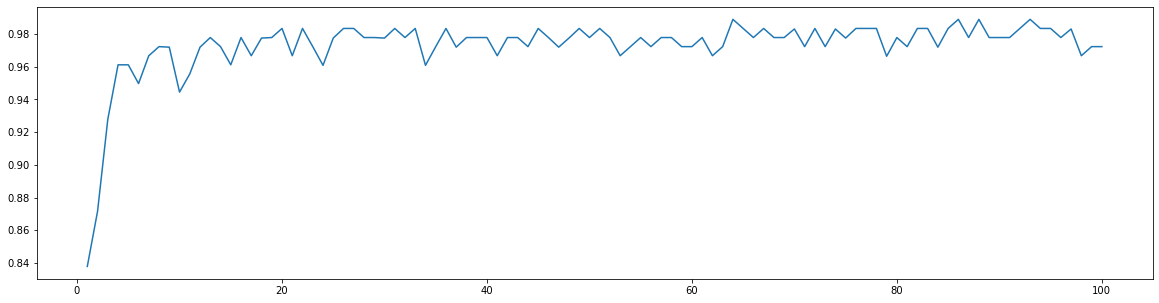

In [9]:
supera=[]
for i in range(100):
    
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    #n_jobs=-1表示使用CPU所有的线程数进行运算，起到并行加速的作用
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    supera.append(rfc_s)
print(max(supera),supera.index(max(supera)))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),supera)
plt.show()
#可以发现当n_estimators不断变大时，得分也是越来越高的，但是不会无限增大

In [10]:
#如果random_state的值不变，则下面这些rfc.estimators_[i].random_state的值也不会变
rfc=RandomForestClassifier(n_estimators=20,random_state=2)
rfc=rfc.fit(Xtrain,Ytrain)

In [11]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state

1872583848

In [12]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [13]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

In [14]:
#由于是装袋法，可以使用袋外数据来做测试集（前提是n非常大）
#那么，现在就无需人为划分测试集和训练集
rfc=RandomForestClassifier(n_estimators=20,oob_score=True)
#加上oob_score=True表示使用袋外数据
rfc=rfc.fit(wine.data,wine.target)

In [15]:
#重要属性oob_score_,代表袋外数据在随机森林中预测出来的准确率 
rfc.oob_score_

0.9719101123595506

In [16]:
rfc.predict(Xtest)
#返回对测试集所对应的标签（target）,score就是比较rfc.predict(Xtest)
#的结果与Ytest中有多少一样

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 0, 0])

In [17]:
Ytest

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 0, 0])

In [18]:
rfc.predict_proba(Xtest)#表示每一个样本被分到那一个标签（target）所对应的概率

array([[1.  , 0.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.15, 0.85],
       [0.9 , 0.1 , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.15, 0.85],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.75, 0.25],
       [0.  , 1.  , 0.  ],
       [0.  , 0.15, 0.85],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.05, 0.95],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.05, 0.1 , 0.85],
       [0.  , 0.  , 1.  ],
       [0.  , 0.15, 0.85],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.05, 0.95],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
 

In [19]:
#随机森林回归用法

In [20]:
from sklearn.datasets import load_boston#标签是连续型变量的数据集
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10,scoring = "neg_mean_squared_error")


array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [21]:
#sklearn当中的模型评估指标（打分）列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [22]:
#随机森林填补缺失值
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer#填补缺失值的类
from sklearn.ensemble import RandomForestRegressor



In [23]:
dataset=load_boston()

In [24]:
dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [25]:
#总共506*13=6578个数据
X_full,y_full=dataset.data,dataset.target

In [26]:
n_samples=X_full.shape[0]
n_features=X_full.shape[1]

In [27]:
#接下来，把这些完整的数据手动变成缺失。然后再用填补缺失值的类来填补缺失值

#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))
#np.floor向下取整，返回.0格式的浮点数

In [28]:
n_missing_samples

3289

In [29]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
missing_features = rng.randint(0,n_features,n_missing_samples)
#randint(下限，上限，n)请在下限和上限之间取出n个整数
missing_samples = rng.randint(0,n_samples,n_missing_samples)
#missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
#replace=False表示不要重复，这样取出来的数都是不重复的
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果我们需要的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中

In [30]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [1]:
X_missing[missing_samples,missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如pandas来得好用

NameError: name 'np' is not defined

In [32]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
#实例化
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [33]:
#训练fit并导出predict
#X_missing_mean已经被均值补上了
X_missing_mean = imp_mean.fit_transform(X_missing)
#pd.DataFrame(X_missing_mean).isnull().sum()
#查看此时的X_missing_mean是否有空值

In [34]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [35]:
#使用随机森林填补缺失值
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
#np.argsort与np.sort的区别
#np.argsort排序完后是从小到大所对应的索引，而np.sort排序没有索引

In [36]:
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [37]:
for i in sortindex:
#构建我们的新特征矩阵（没有被选中去填充的特征值+原始的标签）和新标签（被选中去填充的特征）
    df=X_missing_reg
    fillc=df.iloc[:,i]
    df=pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(y_full)],axis=1)
#在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
#找出我们的训练集和测试集
    Ytrain=fillc[fillc.notnull()]
    Ytest=fillc[fillc.isnull()]
    Xtrain=df_0[Ytrain.index,:]
    Xtest=df_0[Ytest.index,:]
#我们需要的不是Ytest的值，而是Ytest所对应的索引
#用随机森林回归来填补缺失值 
    rfc=RandomForestRegressor(n_estimators=100)
    rfc=rfc.fit(Xtrain,Ytrain)
    Ypredict=rfc.predict(Xtest)
#将填补好的特征返回到我们的原始的特征矩阵中  
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i]=Ypredict

In [38]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.261805,18.000,6.4716,0.14,0.538000,6.64519,65.200,4.090000,1.00,296.00,18.338,390.9710,4.9800
1,0.027310,0.000,5.0507,0.00,0.469000,6.16914,78.900,4.967100,2.00,317.86,18.261,396.9000,9.1400
2,0.027290,13.805,7.0700,0.00,0.462529,7.18500,61.100,4.420458,2.00,242.00,17.923,390.0758,4.7951
3,0.080337,22.645,3.3023,0.00,0.458000,6.93421,45.800,4.875535,3.81,222.00,18.700,393.8780,5.6951
4,0.160685,0.000,2.1800,0.00,0.465709,7.14700,59.732,4.831994,3.91,244.09,18.700,393.5429,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.404000,3.000,9.8243,0.00,0.573000,6.35488,69.100,2.745892,1.00,254.49,21.000,393.3273,9.6700
502,0.045270,0.000,11.9300,0.00,0.573000,6.12000,76.700,2.287500,1.00,273.00,18.537,396.9000,9.0800
503,0.726192,0.450,11.9300,0.16,0.573000,6.97600,91.000,2.405593,4.71,345.36,21.000,379.0411,5.6400
504,0.109590,0.000,11.9300,0.06,0.573000,6.44541,89.300,2.679442,1.00,248.90,21.000,393.4500,6.4800


In [39]:
X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [47]:
#对所有数据进行建模，取得MSE结果
X=[X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse=[]
std=[]
for x in X:
    estimator=RandomForestRegressor(random_state=0,n_estimators=100)
    scores=cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(scores*-1)#mse

In [48]:
mse#mse越小越好

[21.571667100368845,
 40.848037216676374,
 49.626793201980185,
 21.694454918093566]

In [50]:
[*zip(['X_full',"X_missing_mean","X_missing_0","X_missing_reg"],mse)]
#结果表明在X_missing_reg中的得分还是挺不错的,和X_full的分值很接近了，相当不错

[('X_full', 21.571667100368845),
 ('X_missing_mean', 40.848037216676374),
 ('X_missing_0', 49.626793201980185),
 ('X_missing_reg', 21.694454918093566)]

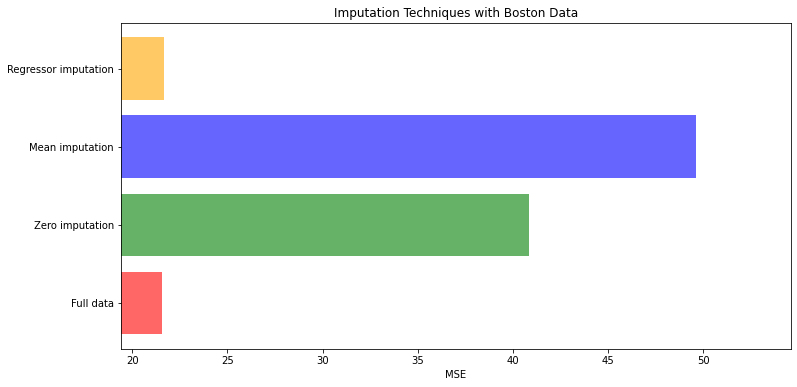

In [51]:
x_labels=['Full data'
          ,'Zero imputation'
          ,'Mean imputation'
          ,'Regressor imputation']
colors=['r','g','b','orange']
plt.figure(figsize=(12,6))
ax=plt.subplot(111)#plt.subplot添加子图  111代表第一行第一列第一个表
for i in np.arange(len(mse)):
    #barh是bar horizon 把条形图横过来 alpha代表条的透明度
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse)*0.9
            ,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()